Data Reading and Feature Generation are handled inside data_load.py file. Refer to that file for details.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../scripts')

In [2]:
from data_load import data_reading
from data_load import feature_generation

In [3]:
train_df, test_df = data_reading()

Generated Features

> **Total Acidity:** Sum of fixed acidity and volatile acidity. It represents the overall acidity level of the wine.

> **Fixed Acidity Ratio:** Ratio of fixed acidity to total acidity. This can be used instead of two variables since the volatile acidity ratio will be 1-fixed acidity ratio. 

> **Sugar-to-Acidity Ratio:** Ratio of residual sugar to total acidity. It provides an indication of the balance between sweetness and acidity.

> **Free sulfur dioxide-to-total sulfur dioxide ratio:** Ratio of free sulfur dioxide to total sulfur dioxide. It can indicate the proportion of active sulfur dioxide in the wine.

> **Alcohol content multiplied by pH:** Multiplying alcohol and pH values can capture potential interactions between these two factors.

*Refer to data_load.py for details*

In [4]:
train_df_new = feature_generation(train_df)
test_df_new = feature_generation(test_df)

Univariate Analysis

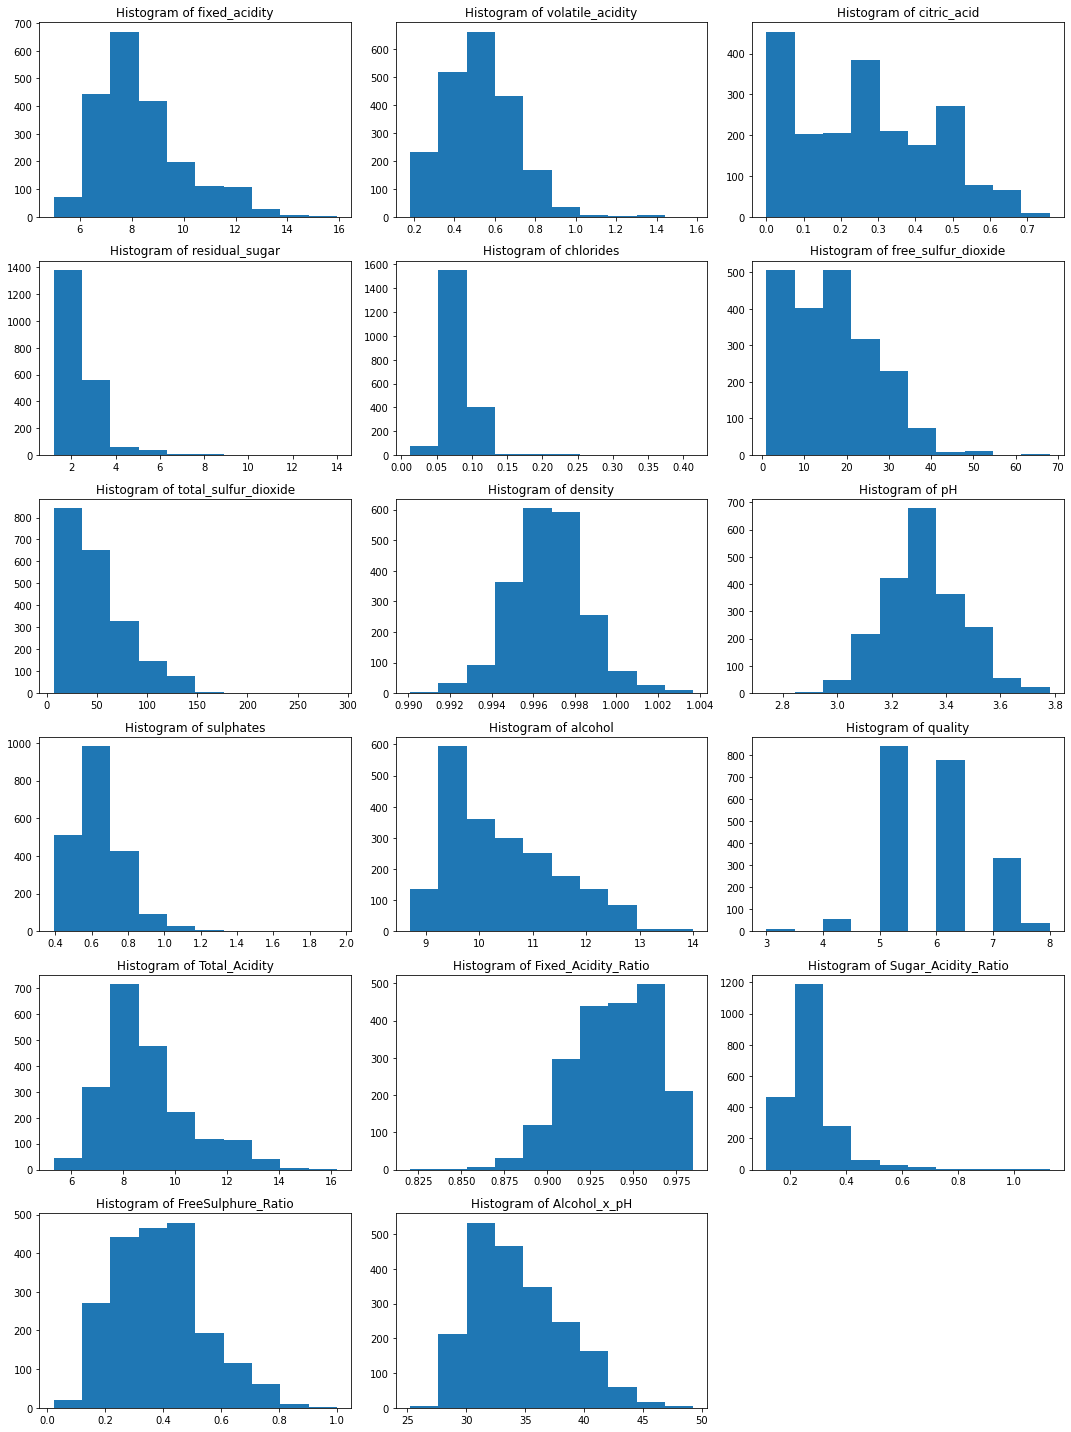

In [9]:
columns_to_plot = train_df.columns

num_cols = 3
if len(columns_to_plot) % 3 == 0:
    num_rows = len(columns_to_plot) // 3
else:
    num_rows = len(columns_to_plot) // 3 + 1


fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 20))
axs = axs.flatten()

for i, column in enumerate(columns_to_plot):
    axs[i].hist(train_df[column])
    axs[i].set_title(f'Histogram of {column}')

if len(columns_to_plot) < num_rows * num_cols:
    for j in range(len(columns_to_plot), num_rows * num_cols):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

Correlation Analysis

In [10]:
correlations = train_df.corr(method='spearman')['quality'].drop('quality').sort_values(ascending=False)
print(correlations)

alcohol                 0.504246
sulphates               0.456985
Alcohol_x_pH            0.445798
FreeSulphure_Ratio      0.245514
Fixed_Acidity_Ratio     0.213902
citric_acid             0.155695
fixed_acidity           0.065743
Total_Acidity           0.041051
residual_sugar          0.034670
pH                      0.022598
Sugar_Acidity_Ratio    -0.009236
free_sulfur_dioxide    -0.070532
chlorides              -0.076010
density                -0.171373
total_sulfur_dioxide   -0.227188
volatile_acidity       -0.247774
Name: quality, dtype: float64
